In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [2]:
df=pd.read_csv("C:/Users/himanshu pandey/Videos/Machine learning projects/loan_prediction/Loan Prediction Dataset.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df.shape

(614, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Pre-Processing the dataset

#### Check for Null Values

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

##### Fill up Null cells with Numerical terms:

In [8]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

#### For categorical Terms fill Maximum appearing Value(MODE)

In [9]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [10]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


##### Final check for Null Values

In [11]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

###### No null Values left

## Moving on:

### EXPLORATORY DATA ANALYSIS

#### To avoid writing df['Gender'] everytime , Storing its value in a variable G and similiary doing it for other Variables as Well.
##### M = df['Married'] ,SE= df['Self_Employed'],  PA=df['Property_Area'],Ed=df['Education'], Dp=df['Dependents'],Status=df['Loan_Status']


In [12]:
G=df['Gender']
M = df['Married']
SE= df['Self_Employed']
PA=df['Property_Area']
Ed=df['Education']
Dp=df['Dependents']
Status=df['Loan_Status']

<AxesSubplot:xlabel='Gender', ylabel='count'>

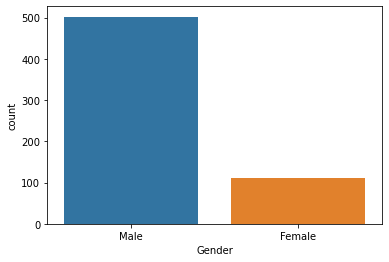

In [13]:
sns.countplot(G)

<AxesSubplot:xlabel='Married', ylabel='count'>

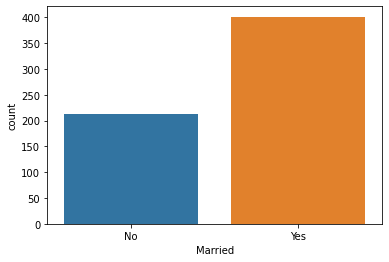

In [14]:
sns.countplot(M)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

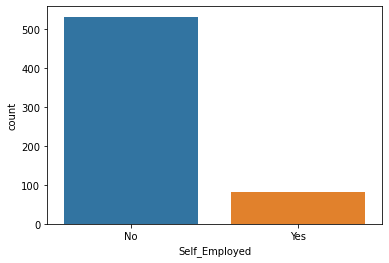

In [15]:
'''SE= df['Self_Employed']
PA=df['Property_Area']
Ed=df['Education']
Dp=df['Dependents'] '''
sns.countplot(SE)

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

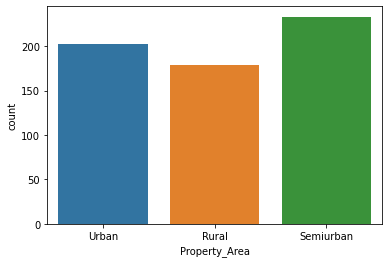

In [16]:
sns.countplot(PA)

<AxesSubplot:xlabel='Education', ylabel='count'>

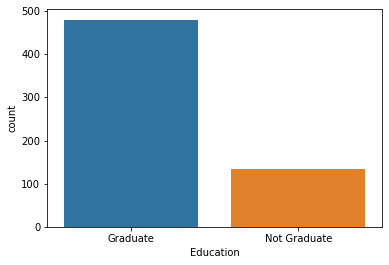

In [17]:
sns.countplot(Ed)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

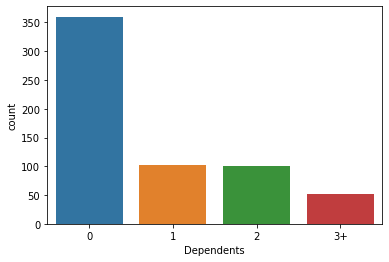

In [18]:
sns.countplot(Dp)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

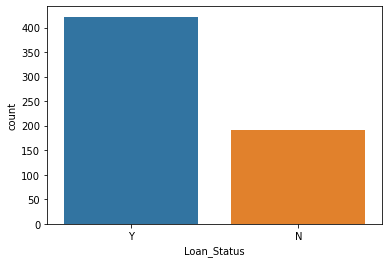

In [19]:
sns.countplot(Status)

### NUMERICAL ATTRIBUTE VISUALIZATION

#### AI = df['ApplicantIncome'], CI=df['CopplicantIncome'],Amount=df['LoanAmount'],Term=df['Loan_Amount_Term'], History=df['CreditHistory']

In [20]:
AI = df['ApplicantIncome']
CI=df['CoapplicantIncome']
Amount=df['LoanAmount']
Term=df['Loan_Amount_Term']
Cred=df['Credit_History']

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

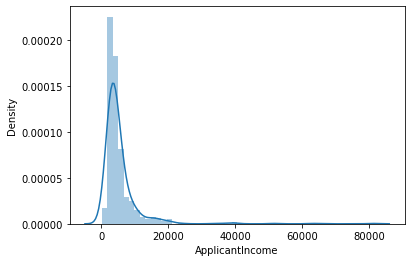

In [21]:
sns.distplot(AI)

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

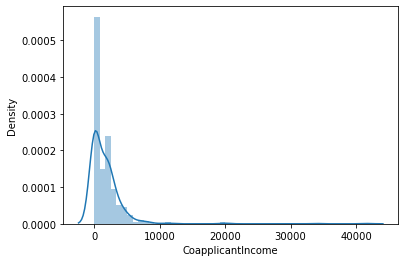

In [22]:
sns.distplot(CI)

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

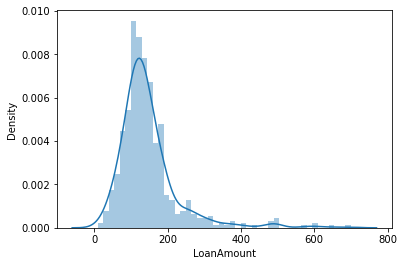

In [23]:
sns.distplot(Amount)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

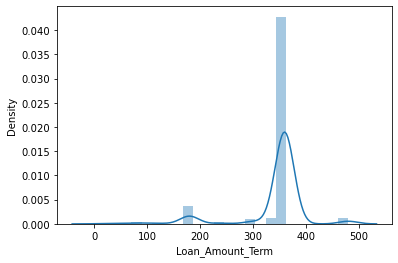

In [24]:
sns.distplot(Term)

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

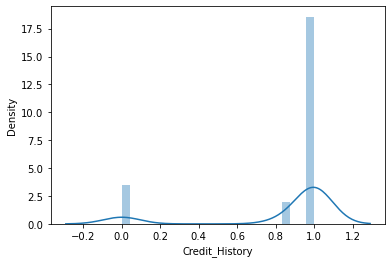

In [25]:
sns.distplot(Cred)

## Creation Of New Attributes

### Total Income

In [26]:
df['Total_Income']=AI+CI
TI=df['Total_Income']

### Log Transformations

<AxesSubplot:xlabel='Applicant_Income_log', ylabel='Density'>

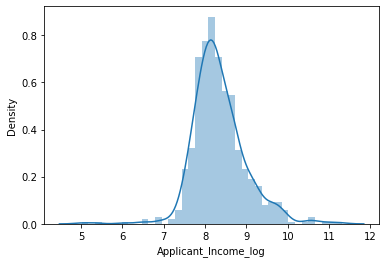

In [27]:
df["Applicant_Income_log"]=np.log(AI)
AI_Log=df["Applicant_Income_log"]
sns.distplot(AI_Log)

##### Above curve looks much more normalised

<AxesSubplot:xlabel='Loan_Amount_log', ylabel='Density'>

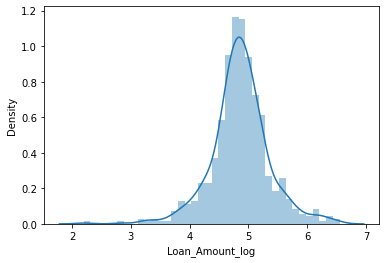

In [28]:
df["Loan_Amount_log"]=np.log(Amount)
Amount_Log=df["Loan_Amount_log"]
sns.distplot(Amount_Log)

<AxesSubplot:xlabel='Total_Income_Log', ylabel='Density'>

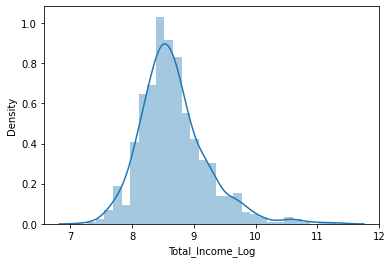

In [29]:
df["Total_Income_Log"]=np.log(TI)
TI_Log=df["Total_Income_Log"]
sns.distplot(TI_Log)

### BUILDING CORRELATION MATRIX

<AxesSubplot:>

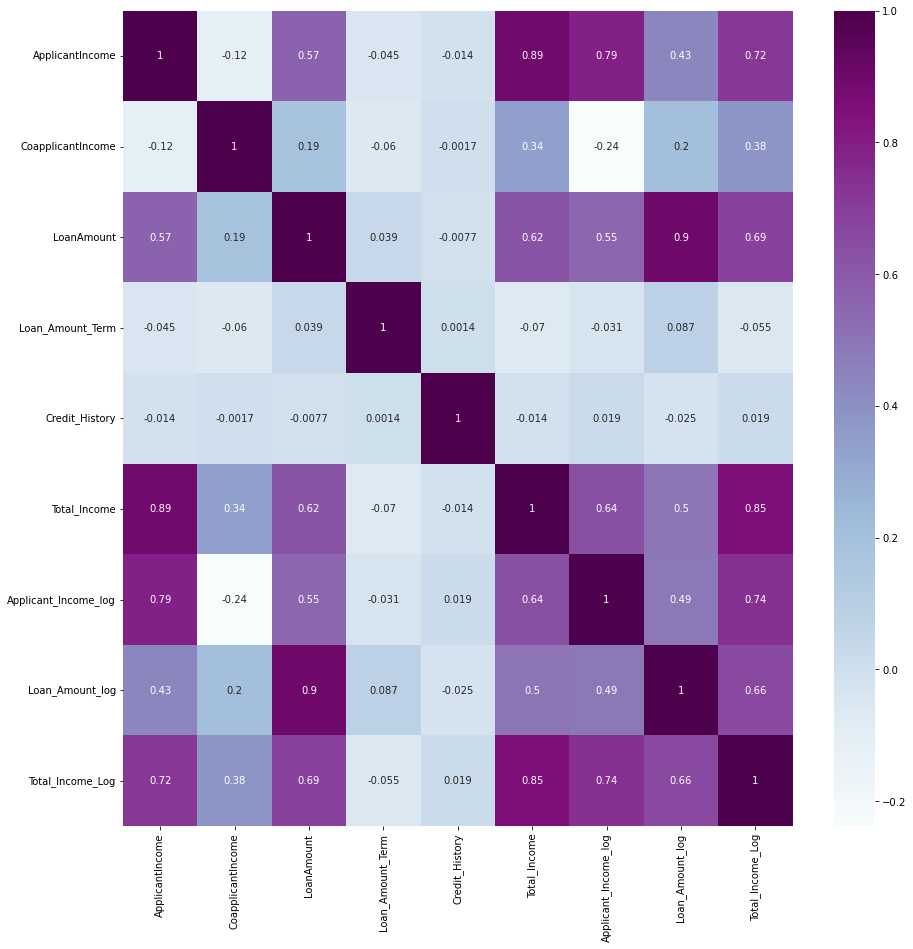

In [30]:
corr = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot = True, cmap= "BuPu")

##### It shows correlation between Various Attributes, Dark--> Max Correlation, lighter ones less correlated

In [31]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Applicant_Income_log,Loan_Amount_log,Total_Income_Log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674026,4.986426,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.430109,4.852030,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006368,4.189655,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,7.856707,4.787492,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699515,4.948760,8.699515


### Removing Not needed Columns

In [33]:
cols=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_Income','Loan_ID']
df1=df.drop(columns=cols,axis=1)
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Applicant_Income_log,Loan_Amount_log,Total_Income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,4.986426,8.674026
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430109,4.852030,8.714568
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,4.189655,8.006368
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.856707,4.787492,8.505323
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,4.948760,8.699515


### LABEL ENCODING

### Conversion of Categorical to Numerical Columns

In [34]:
from sklearn.preprocessing import LabelEncoder
cols=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status','Dependents']
le=LabelEncoder()
for col in cols:
    df1[col] = le.fit_transform(df1[col])

In [35]:
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Applicant_Income_log,Loan_Amount_log,Total_Income_Log
0,1,0,0,0,0,1.0,2,1,8.674026,4.986426,8.674026
1,1,1,1,0,0,1.0,0,0,8.430109,4.852030,8.714568
2,1,1,0,0,1,1.0,2,1,8.006368,4.189655,8.006368
3,1,1,0,1,0,1.0,2,1,7.856707,4.787492,8.505323
4,1,0,0,0,0,1.0,2,1,8.699515,4.948760,8.699515


### TRAIN-TEST SPLIT

###### I/P : All features (except loan_status)  O/P : Loan_Status

In [36]:
x=df1.drop(columns=['Loan_Status'],axis=1)
y=df1['Loan_Status']

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state = 42)

# 70 percent data for training
#30 percent data for testing 

### MODEL TRAINING

#### Use of different classifiers

In [38]:
from sklearn.model_selection import cross_val_score
def classify(model,x,y):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
    model.fit(x_train,y_train)
    print("ACCURACY IS", model.score(x_test,y_test)*100)
    score = cross_val_score(model,x,y,cv=5) #cv=5, Number of slits=5
    print("CROSS VALIDATION",np.mean(score)*100)

#### LOGISTIC REGRESSION

In [39]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
classify(model,x,y)

ACCURACY IS 78.37837837837837
CROSS VALIDATION 80.9462881514061


### DECISION-TREE CLASSIFIER

In [40]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model,x,y)

ACCURACY IS 71.35135135135135
CROSS VALIDATION 72.31507397041183


### RANDOM FOREST CLASSIFIER

In [41]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model,x,y)

ACCURACY IS 78.37837837837837
CROSS VALIDATION 78.50859656137546


### EXTRA-TREES CLASSIFIER

In [42]:
model= ExtraTreesClassifier()
classify(model,x,y)

ACCURACY IS 72.97297297297297
CROSS VALIDATION 76.22817539650806


### XGBOOST : Extreme Gradient Boosting


In [43]:
from xgboost import XGBClassifier
model = XGBClassifier()
classify(model,x,y)

ACCURACY IS 76.75675675675676
CROSS VALIDATION 76.87191789950687


In [44]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


### Lightgbm : LIGHT GRADIENT BOOSTING MACHINE

In [45]:
from lightgbm import LGBMClassifier
model=LGBMClassifier()
classify(model,x,y)

ACCURACY IS 77.83783783783784
CROSS VALIDATION 77.36372117819539


In [46]:
!pip install catboost

### CATBOOST

In [47]:
from catboost import CatBoostClassifier
model=CatBoostClassifier()
classify(model,x,y)

Learning rate set to 0.007178
0:	learn: 0.6906319	total: 101ms	remaining: 1m 40s
1:	learn: 0.6868098	total: 106ms	remaining: 52.8s
2:	learn: 0.6826866	total: 111ms	remaining: 36.8s
3:	learn: 0.6788824	total: 116ms	remaining: 28.8s
4:	learn: 0.6747743	total: 120ms	remaining: 24s
5:	learn: 0.6705178	total: 125ms	remaining: 20.7s
6:	learn: 0.6669125	total: 130ms	remaining: 18.4s
7:	learn: 0.6629258	total: 135ms	remaining: 16.7s
8:	learn: 0.6592515	total: 140ms	remaining: 15.4s
9:	learn: 0.6556430	total: 144ms	remaining: 14.3s
10:	learn: 0.6520842	total: 149ms	remaining: 13.4s
11:	learn: 0.6489888	total: 153ms	remaining: 12.6s
12:	learn: 0.6458973	total: 157ms	remaining: 11.9s
13:	learn: 0.6426619	total: 161ms	remaining: 11.3s
14:	learn: 0.6392554	total: 166ms	remaining: 10.9s
15:	learn: 0.6360968	total: 171ms	remaining: 10.5s
16:	learn: 0.6330552	total: 176ms	remaining: 10.2s
17:	learn: 0.6301675	total: 179ms	remaining: 9.78s
18:	learn: 0.6272376	total: 184ms	remaining: 9.52s
19:	learn: 0

### HYPER-PARAMETER TUNING

In [48]:
from sklearn.model_selection import RandomizedSearchCV
#LOOk for greater CV or different type parameter tuning methods like weights and optimization

In [49]:
# Randomized search CV

n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]
max_features=['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5,30,num=6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

In [50]:
random_grid = {'n_estimators':n_estimators,
               'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [65]:
rf=RandomForestClassifier()

In [66]:
rf=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring='accuracy',n_iter=10,cv=5,verbose=2,n_jobs=1)

In [67]:
rf.fit(x,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=100; total time=   0.0s
[CV] END max_depth

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100]},
                   scoring='accuracy', verbose=2)

In [68]:
rf.best_score_

0.809462881514061

In [69]:
rf.best_params_

{'min_samples_split': 100,
 'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'max_depth': 30}

In [70]:
max_features=['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5,30,num=6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

In [71]:
random_grid = {
               'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf}
print(random_grid)

{'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [72]:
dt=DecisionTreeClassifier()
dt=RandomizedSearchCV(estimator=dt,param_distributions=random_grid,scoring='accuracy',n_iter=10,cv=5,verbose=2,n_jobs=1)

In [73]:
dt.fit(x,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15; total time=   0.0s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15; total time=   0.0s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15; total time=   0.0s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15; total time=   0.0s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_dep

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100]},
                   scoring='accuracy', verbose=2)

In [74]:
dt.best_score_

0.7883113421298147

In [75]:
dt.best_params_

{'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 5}

In [76]:
#Randomizedsearch CV
n_estimator=[int(x) for x in np.linspace(100,1200,12)] #start=100,end=1200,num=12
max_features=['auto','sqrt']
max_depth =[int(x) for x in np.linspace(5,30,6)] 
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]

In [77]:
random_grid = {'n_estimators':n_estimators,
               'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [78]:
ex = ExtraTreesClassifier()
ex=RandomizedSearchCV(estimator=ex,param_distributions = random_grid,scoring='accuracy',n_iter=10,cv=5,verbose=2,n_jobs=1)

In [79]:
ex.fit(x,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=800; total time=   0.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=800; total time=   0.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=800; total time=   0.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=800; total time=   0.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=800; total time=   0.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=400; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=400; total time=   0.3s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estima

RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='accuracy', verbose=2)

In [80]:
ex.best_score_

0.809462881514061

In [81]:
ex.best_params_

{'n_estimators': 400,
 'min_samples_split': 15,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 10}

In [82]:
from scipy.stats import uniform
from scipy.stats import randint

In [83]:
xgb=XGBClassifier()

In [84]:
params = {
    "gamma" : uniform(0,0.5),
    "learning_rate" : uniform(0.03,0.3),  #default=0.1.
    "max_depth" : randint(2,6), #default 3
    "n_estimators" : randint(100,150), # default 100
    "subsample" : uniform(0.6,0.4)
}

In [85]:
xgb=RandomizedSearchCV(estimator=xgb,param_distributions = params, scoring='accuracy', n_iter = 10, cv=5, verbose=2, random_state = 42, n_jobs=1)

In [87]:
xgb.fit(x,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[CV] END gamma=0.07800932022121826, learning_rate=0.07679835610086079, max_depth=4, n_estimators=110, subsample=0.9464704583099741; total time=   0.0s
[CV] END gamma=0.07800932022121826, le

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002AEA85FEB50>,
     

In [88]:
xgb.best_score_


0.8029721444755431

In [89]:
xgb.best_params_

{'gamma': 0.30582658024414044,
 'learning_rate': 0.03211989156591522,
 'max_depth': 2,
 'n_estimators': 148,
 'subsample': 0.8099098641033556}

In [90]:
grid = {'learning_rate': [0.03,0.1],
        'depth' : [4,6,10],
        'l2_leaf_reg' : [1,3,5,7,9]}

In [93]:
cb=CatBoostClassifier()
cb=RandomizedSearchCV(estimator=cb,param_distributions = grid, scoring = 'accuracy', n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [94]:
cb.fit(x,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
0:	learn: 0.6494979	total: 5.77ms	remaining: 5.76s
1:	learn: 0.6133473	total: 6.39ms	remaining: 3.19s
2:	learn: 0.5792413	total: 20.3ms	remaining: 6.76s
3:	learn: 0.5511617	total: 24.4ms	remaining: 6.08s
4:	learn: 0.5252652	total: 37.9ms	remaining: 7.54s
5:	learn: 0.5056088	total: 41.4ms	remaining: 6.87s
6:	learn: 0.4865523	total: 55.9ms	remaining: 7.92s
7:	learn: 0.4687645	total: 73.3ms	remaining: 9.09s
8:	learn: 0.4533676	total: 91.4ms	remaining: 10.1s
9:	learn: 0.4392593	total: 105ms	remaining: 10.4s
10:	learn: 0.4319913	total: 106ms	remaining: 9.56s
11:	learn: 0.4191916	total: 120ms	remaining: 9.91s
12:	learn: 0.4071184	total: 133ms	remaining: 10.1s
13:	learn: 0.3980499	total: 146ms	remaining: 10.3s
14:	learn: 0.3871905	total: 158ms	remaining: 10.4s
15:	learn: 0.3822612	total: 161ms	remaining: 9.88s
16:	learn: 0.3717128	total: 175ms	remaining: 10.1s
17:	learn: 0.3707448	total: 176ms	remaining: 9.59s
18:	learn: 0.3685139	t

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostClassifier object at 0x000002AEA86E2310>,
                   n_jobs=1,
                   param_distributions={'depth': [4, 6, 10],
                                        'l2_leaf_reg': [1, 3, 5, 7, 9],
                                        'learning_rate': [0.03, 0.1]},
                   random_state=42, scoring='accuracy', verbose=2)

In [95]:
cb.best_score_

0.7833933093429295

In [96]:
cb.best_params_

{'learning_rate': 0.1, 'l2_leaf_reg': 7, 'depth': 10}

## CONFUSION MATRIX

In [97]:
from sklearn.metrics import confusion_matrix

In [106]:
y_pred = dt.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 31,  34],
       [  3, 117]], dtype=int64)

<AxesSubplot:>

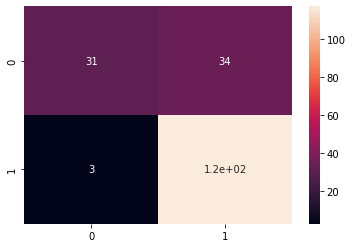

In [107]:
sns.heatmap(cm,annot=True)

In [108]:
y_predict=rf.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 31,  34],
       [  3, 117]], dtype=int64)

<AxesSubplot:>

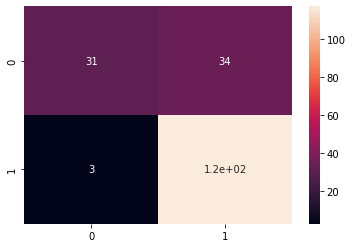

In [110]:
sns.heatmap(cm,annot=True)

In [111]:
y_pred= ex.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 27,  38],
       [  2, 118]], dtype=int64)

<AxesSubplot:>

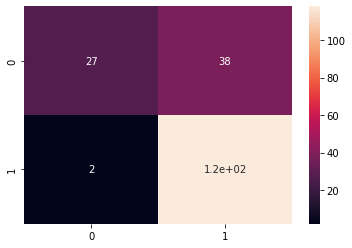

In [112]:
sns.heatmap(cm,annot=True)

In [113]:
y_predict = xgb.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 27,  38],
       [  2, 118]], dtype=int64)

<AxesSubplot:>

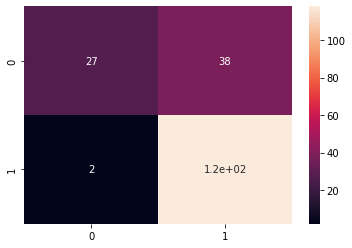

In [115]:
sns.heatmap(cm,annot=True)